In [48]:
import cv2

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(a, None)
kp2, des2 = sift.detectAndCompute(b, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

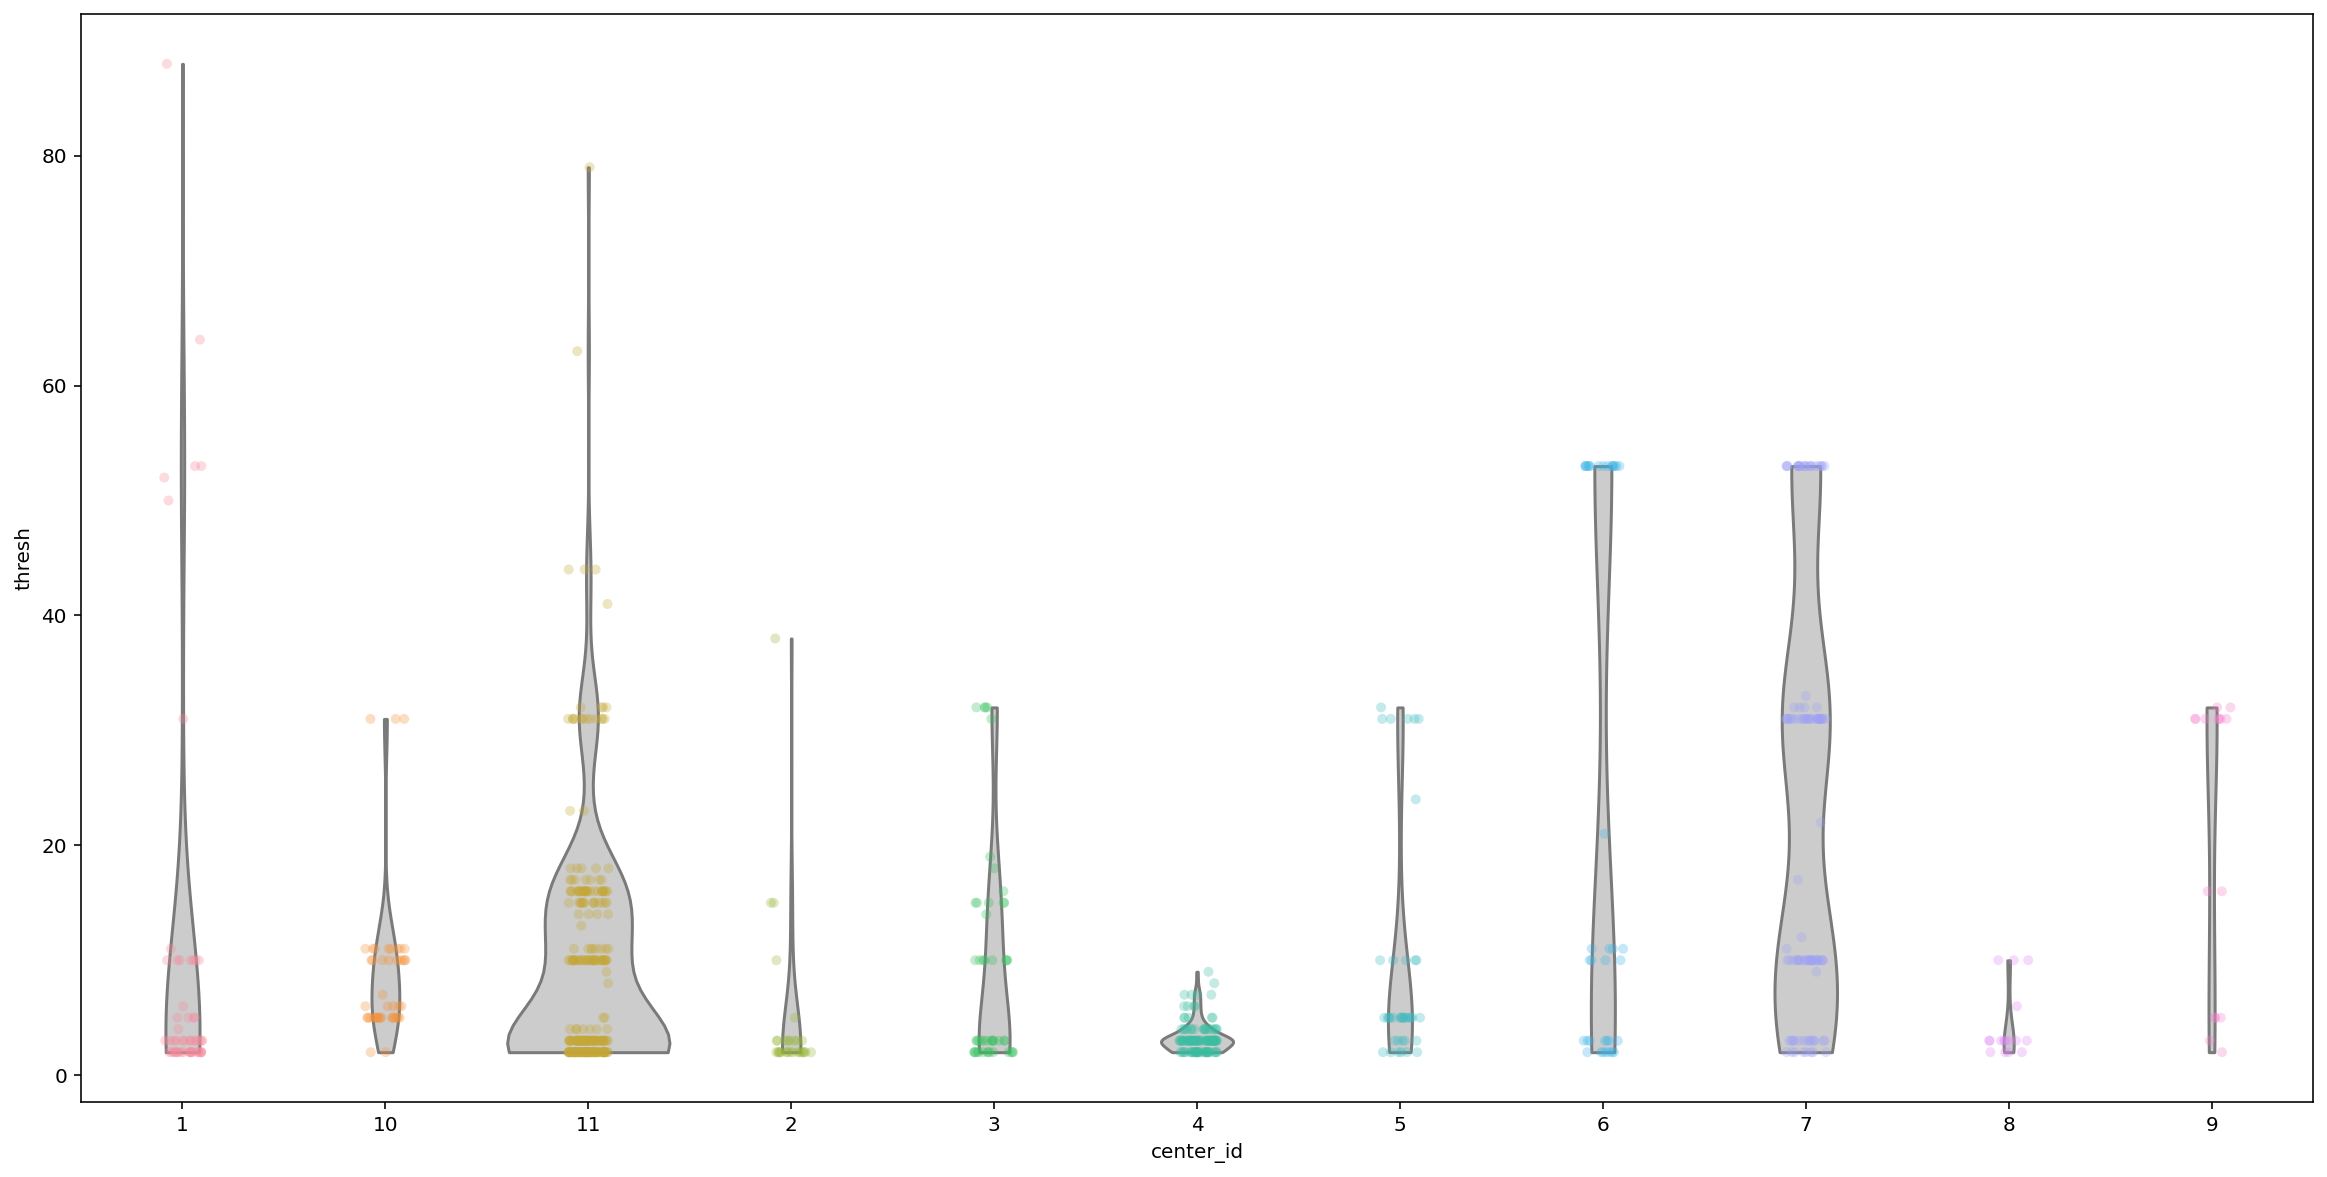

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

ax = sns.violinplot(data=train_meta, x="center_id", y="thresh", inner=None, color=".8", cut=0.0, scale="count")
ax = sns.stripplot(data=train_meta, x="center_id", y="thresh", alpha=0.3)

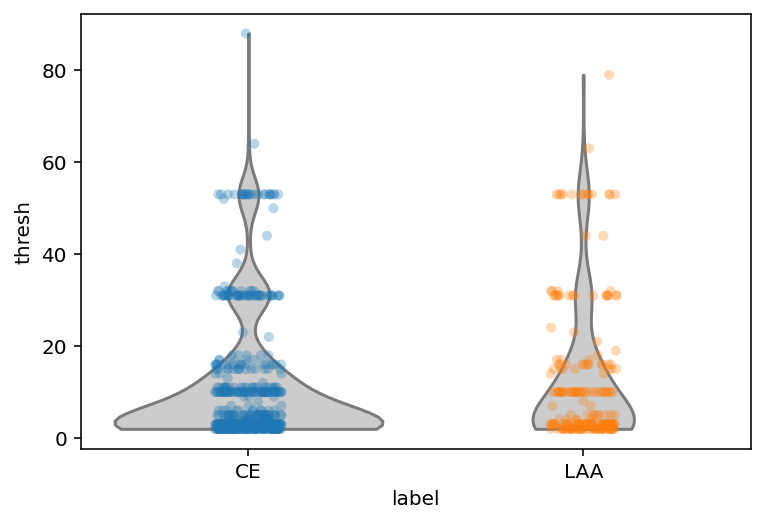

In [70]:
ax = sns.violinplot(data=train_meta, x="label", y="thresh", inner=None, color=".8", cut=0.0, scale="count")
ax = sns.stripplot(data=train_meta, x="label", y="thresh", alpha=0.3)

KeyboardInterrupt: 

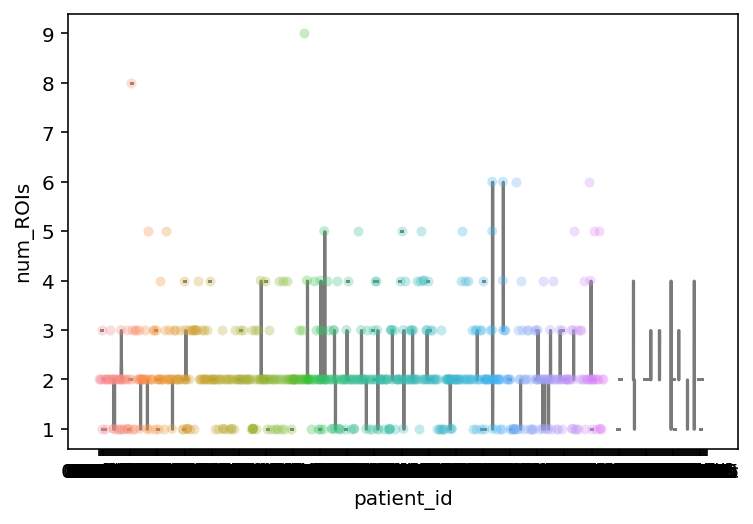

In [81]:
ax = sns.violinplot(data=train_meta, x="patient_id", y="num_ROIs", inner=None, color=".8", cut=0.0, scale="count")
ax = sns.stripplot(data=train_meta, x="patient_id", y="num_ROIs", alpha=0.3)

In [1]:
import pandas as pd

rois = pd.read_csv(
    "outputs/2022-08-21/19-10-45/ROIs.csv",
    dtype={
        "image_id": "string",
        "roi_num": "uint8",
        "x": "uint32",
        "y": "uint32",
        "w": "uint32",
        "h": "uint32",
        "thresh": "float32",
    },
)
rois = rois.merge(pd.read_csv("mayo_clinic_strip_ai/data/train.csv"), on="image_id", how="inner", validate="m:1")
rois.query("w > 1024 and h > 1024", inplace=True)
rois.eval("area = h * w", inplace=True)


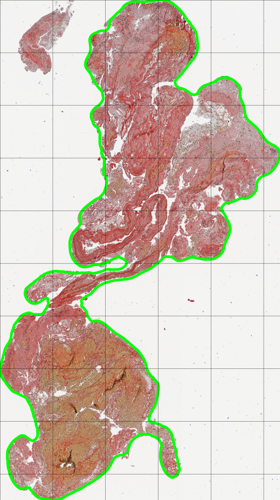

In [21]:
# %env OPENCV_IO_MAX_IMAGE_PIXELS=999999999999
import cv2
from openslide import OpenSlide

# "b894f4_0" and "6baf51_0"
# x = cv2.imread("mayo_clinic_strip_ai/data/train/09644e_3.tif")

img_id = "01adc5_0"
roi_num = 0
img = OpenSlide(f"mayo_clinic_strip_ai/data/train/{img_id}.tif")
o = np.load(f"mayo_clinic_strip_ai/data/ROIs/train/{img_id}/{roi_num}.npy")
x, y, w, h = cv2.boundingRect(o)
o -= o.min(axis=0)
i = img.read_region(location=(x, y), level=0, size=(w, h))
i = np.array(i)
i = cv2.cvtColor(i, cv2.COLOR_RGBA2RGB)
# i = cv2.bitwise_not(i)
plot(cv2.drawContours(image=i.copy(), contours=[o], contourIdx=0, color=(0, 255, 0), thickness=50), crop=1024, color=(0, 0, 0))

In [15]:
%env OPENCV_IO_MAX_IMAGE_PIXELS=999999999999
import cv2
i = cv2.imread(f"mayo_clinic_strip_ai/data/train/{img_id}.tif", cv2.IMREAD_UNCHANGED)

env: OPENCV_IO_MAX_IMAGE_PIXELS=999999999999


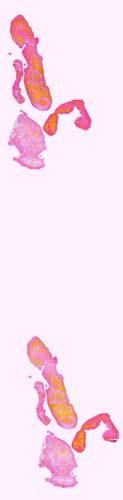

In [16]:
plot(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [4]:
hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
# s = hsv[:, :, 1]
# thresh, _ = cv2.threshold(s, thresh=0, maxval=1, type=cv2.THRESH_OTSU, dst=s)
# i *= np.expand_dims(s, axis=2)

In [5]:
hsv.shape

(38703, 25283, 3)

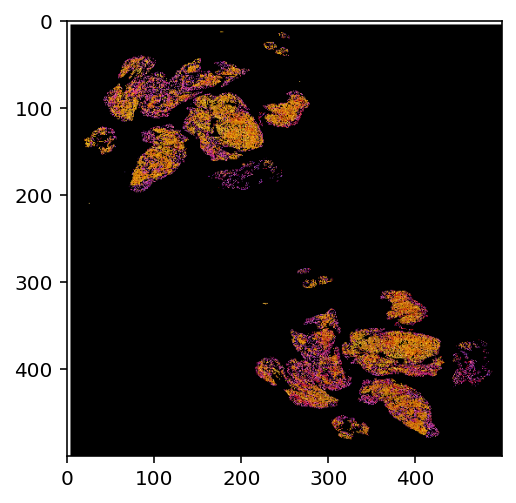

In [12]:
plot(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

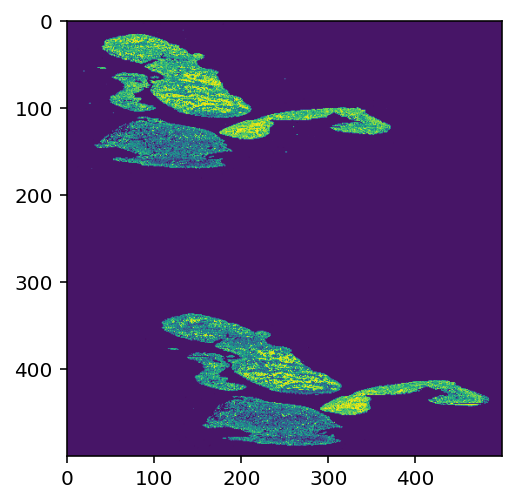

In [16]:
_, s, _ = cv2.split(cv2.cvtColor(i, cv2.COLOR_BGR2HSV))
plot(s, crop=None)

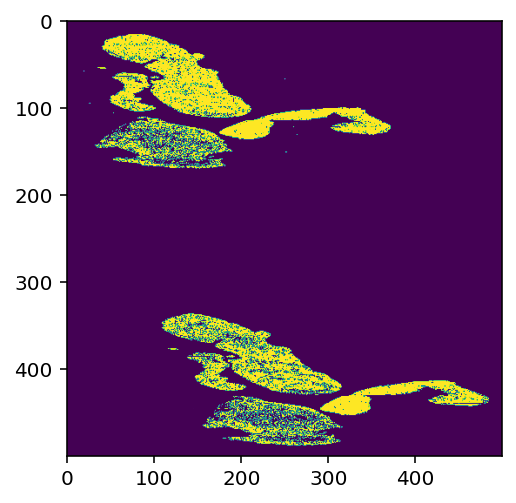

In [18]:
thresh, mask = cv2.threshold(s, thresh=0.0, maxval=255, type=cv2.THRESH_OTSU)
plot(mask, crop=None)

In [2]:
from mayo_clinic_strip_ai.data import ROIDataset
import cv2
import pandas as pd
from mayo_clinic_strip_ai.utils import plot_thumbnail

rois = pd.read_csv("outputs/2022-08-23/07-46-04/ROIs.csv")
rois.query("h / w > 1 / 12 and h / w < 12", inplace=True)
rois.query("area >= 1024 ** 2", inplace=True)
rois.reset_index(inplace=True, drop=True)

dataset = ROIDataset(
    metadata=rois,
    training=False,
    tif_dir="mayo_clinic_strip_ai/data/train",
    outline_dir="outputs/2022-08-23/07-46-04/outlines",
    crop_size=512,
    min_intersect_pct=0.90,
)

# for i in range(len(dataset)):
#     try:
#         x = dataset[i]
#     except RuntimeError as e:
#         print(e, dataset.metadata.iloc[i].to_dict())
#     except ValueError:
#         continue

x = dataset[38]
# x = x.numpy().transpose(1, 2, 0)
# plot(x, crop=None)

0


/Users/Jake/Projects/kaggle/mayo_clinic_strip_ai/utils.py:47: RuntimeWarning: divide by zero encountered in log
  normed = 255 ** (np.log(img) / np.log(I_0))


In [9]:
rois = pd.read_csv("outputs/2022-08-23/07-46-04/ROIs.csv")
rois.drop(["Unnamed: 0"], axis=1, inplace=True)
rois.to_csv("outputs/2022-08-23/07-46-04/ROIs.csv", index=None)

In [8]:
rois

,image_id,roi_num,x,y,w,h,area,I_0_B,I_0_G,I_0_R
0,0372b0_0,0,276,3870,600,996,338933.5,192,211,196
1,0372b0_0,1,173,149,606,1011,346881.0,192,211,196
2,026c97_0,0,264,138,1795,1350,935170.5,255,255,255
3,008e5c_0,0,0,4567,788,1306,748576.5,255,255,255
4,008e5c_0,1,267,0,804,1320,774084.0,255,255,255
...,...,...,...,...,...,...,...,...,...,...
11655,fbdcde_1,47,13618,152,43,29,899.0,244,244,244
11656,fbdcde_1,48,13310,67,114,55,2623.0,244,244,244
11657,fbdcde_1,49,12941,0,113,22,1926.0,244,244,244
11658,fbdcde_1,50,11205,0,96,21,1543.5,244,244,244


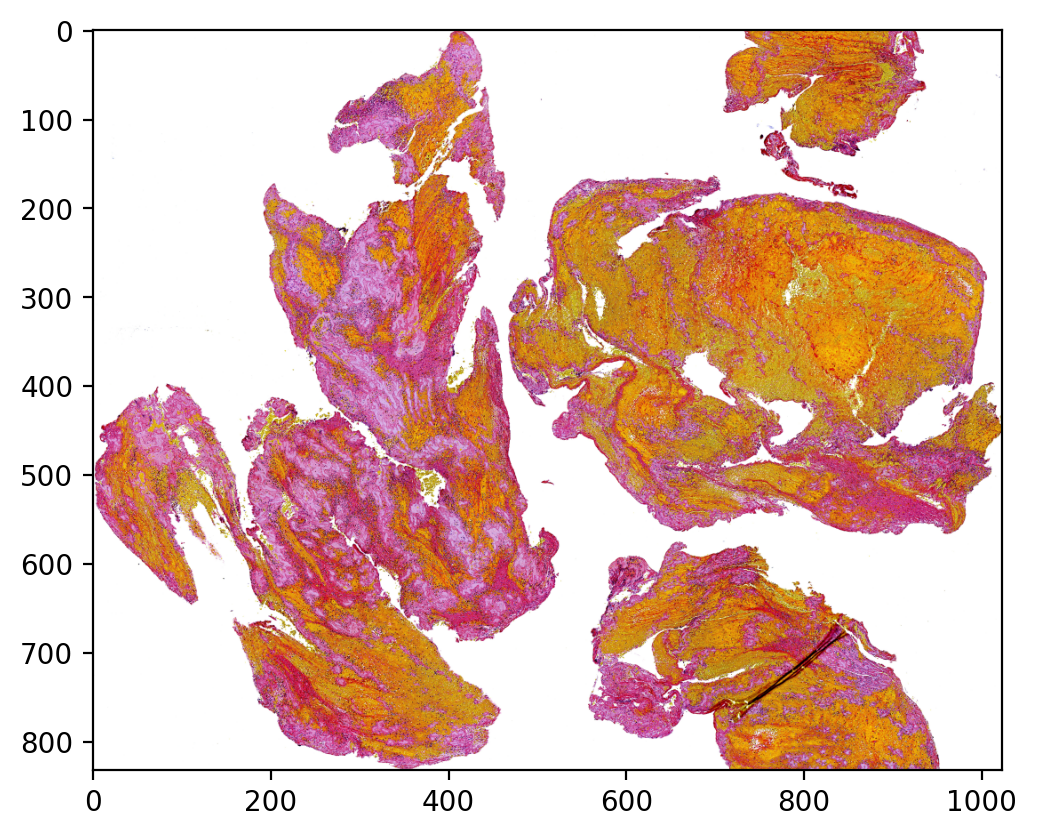

In [3]:
plot_thumbnail(x.numpy().transpose(1, 2, 0), crop=None)

mayo_clinic_strip_ai/data/train/006388_0.tif 0.1856670559402602 0.4081512629752698 874.97577


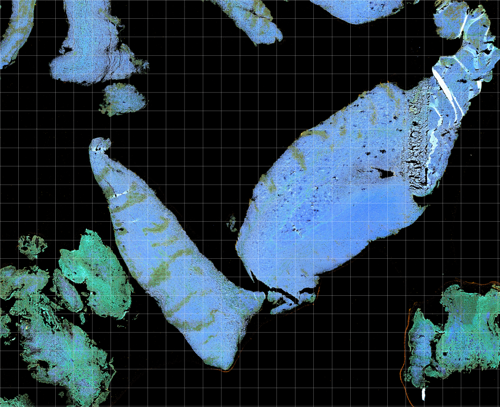

In [48]:
from openslide import OpenSlide
import cv2
from mayo_clinic_strip_ai.data import ROIDataset, Rect

row = rois.loc[rois.sort_values("blur").index[0]]
img = OpenSlide(f"mayo_clinic_strip_ai/data/train/{row['image_id']}.tif")
w, h = img.dimensions
crop = ROIDataset._read_region(img=img, crop=Rect(x=row["x"], y=row["y"], w=row["w"], h=row["h"]))
_, mask = cv2.threshold(cv2.cvtColor(crop, cv2.COLOR_RGB2GRAY), thresh=row["thresh"], maxval=255, type=cv2.THRESH_BINARY)
crop = np.where(np.expand_dims(mask, axis=2) > 0, crop, 0)
print(img._filename, row["h"] / h, row["w"] / w, row["blur"])

plot(crop, crop=512)

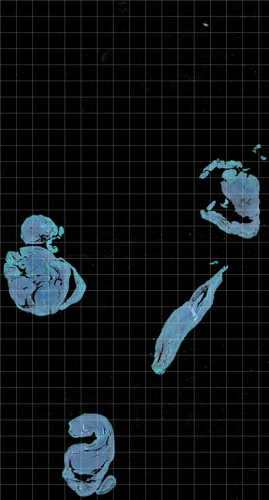

In [40]:
plot(crop, crop=1024, thickness=10)

In [50]:
from mayo_clinic_strip_ai.stain import normalize_staining

inorm, h, e = normalize_staining(cv2.bitwise_not(crop))

In [55]:
# plot(e, crop=None)
inorm.mean(axis=(0, 1))

array([245.11553201, 240.502079  , 242.99132069])

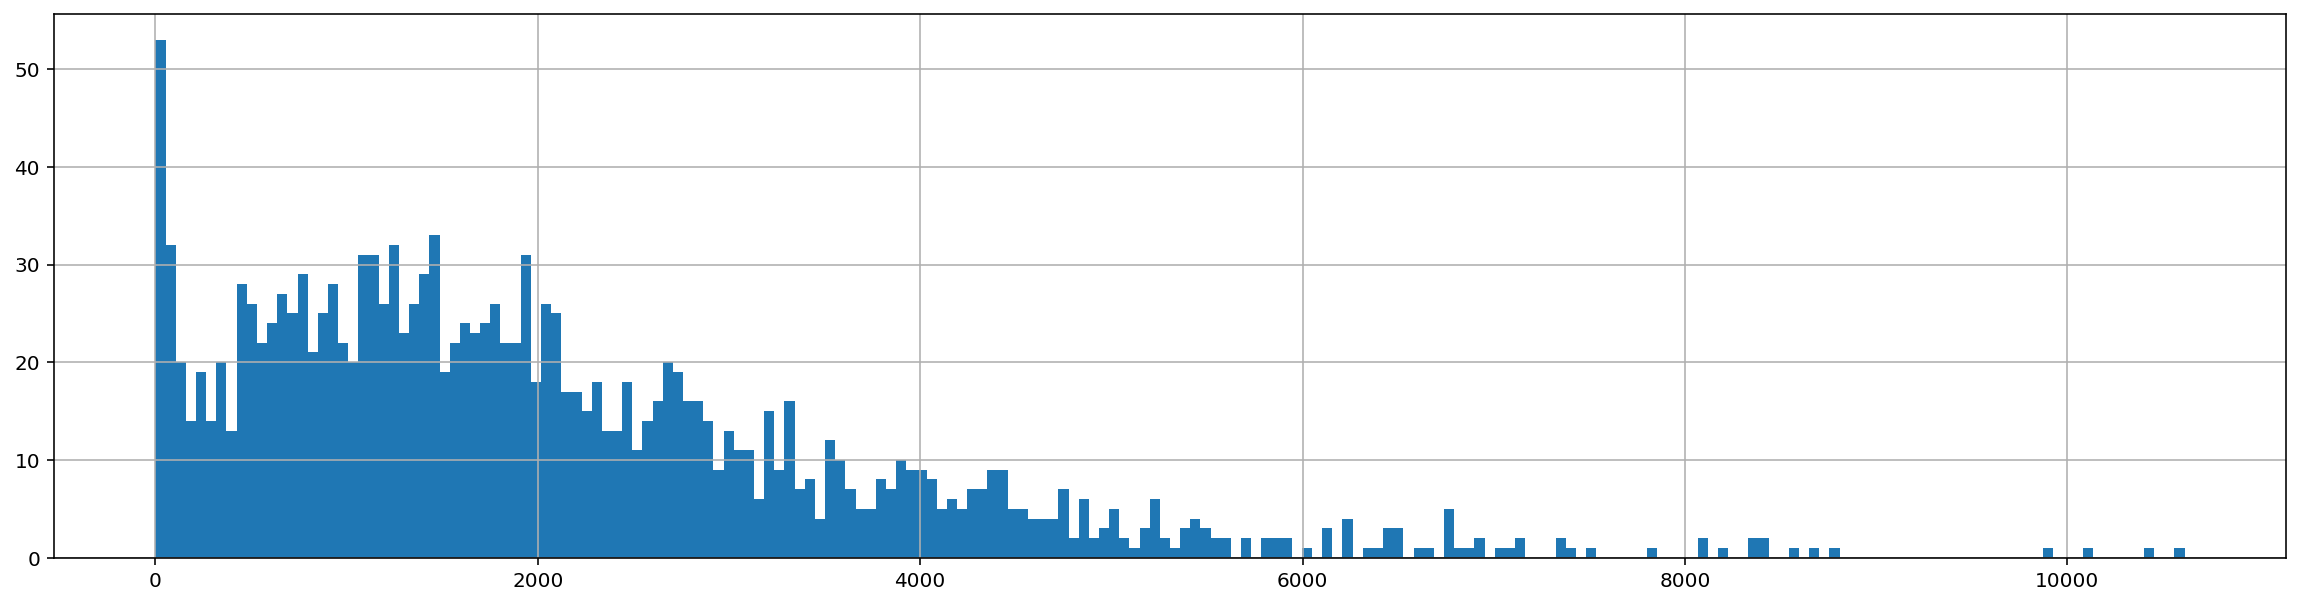

In [21]:
rois["blur"].hist(bins=200, figsize=(20, 5));

<AxesSubplot:xlabel='w', ylabel='h'>

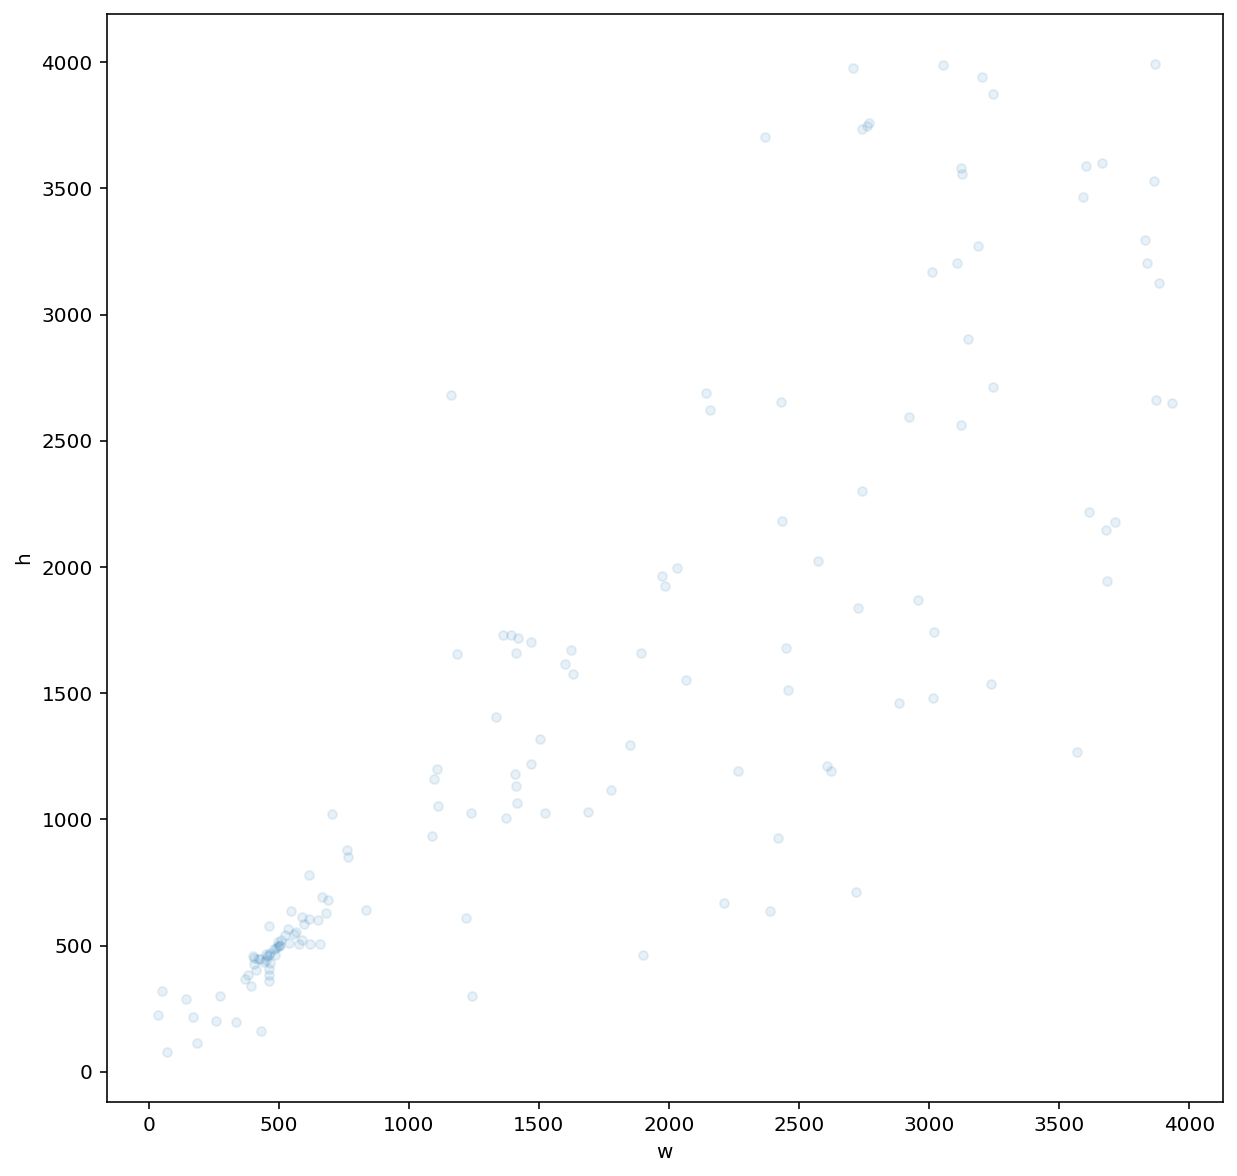

In [67]:
# rois.plot.hexbin(x="w", y="h", figsize=(10, 10))
rois.query("w < 4000 and h < 4000").plot.scatter(x="w", y="h", figsize=(10, 10), alpha=0.1)

In [75]:
from PIL import Image
from PIL.TiffTags import lookup

Image.MAX_IMAGE_PIXELS = 99999999999


def get_tif_tags(image_id: str):
    tags = {
        "image_id": image_id
    }
    with Image.open("mayo_clinic_strip_ai/data/train/" + image_id + ".tif") as i:
        for k, v in i.tag.items():
            k = lookup(k)
            if len(v) == 1:
                v = v[0]
            if k.name not in ["TileOffsets", "TileByteCounts"]:
                tags[k.name] = v
    return pd.Series(tags)


df = pd.read_csv("mayo_clinic_strip_ai/data/train.csv")
tags = df["image_id"].apply(get_tif_tags)

In [89]:
x = df.merge(tags, on="image_id", validate="1:1", how="inner")

In [117]:
pd.crosstab(x["center_id"], columns=[x["XResolution"], x["YResolution"]], margins=True, normalize=False)

XResolution,"(10, 1)","(5089463, 256)",All
YResolution,"(10, 1)","(5089463, 256)",
center_id,,,
1,54,0,54
2,27,2,29
3,40,9,49
4,114,0,114
5,38,0,38
6,38,0,38
7,99,0,99
8,16,0,16


In [114]:
x.loc[x["XResolution"] == (5089463, 256), "center_id"].nunique()

3

<AxesSubplot:xlabel='label', ylabel='area'>

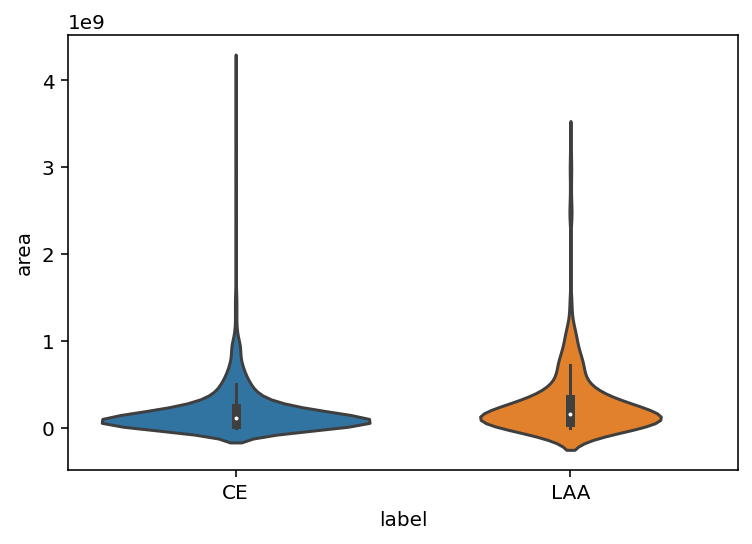

In [129]:
import seaborn as sns

sns.violinplot(data=rois.merge(df, on="image_id", how="inner", validate="m:1"), x="label", y="area")

<AxesSubplot:xlabel='label', ylabel='ImageLength'>

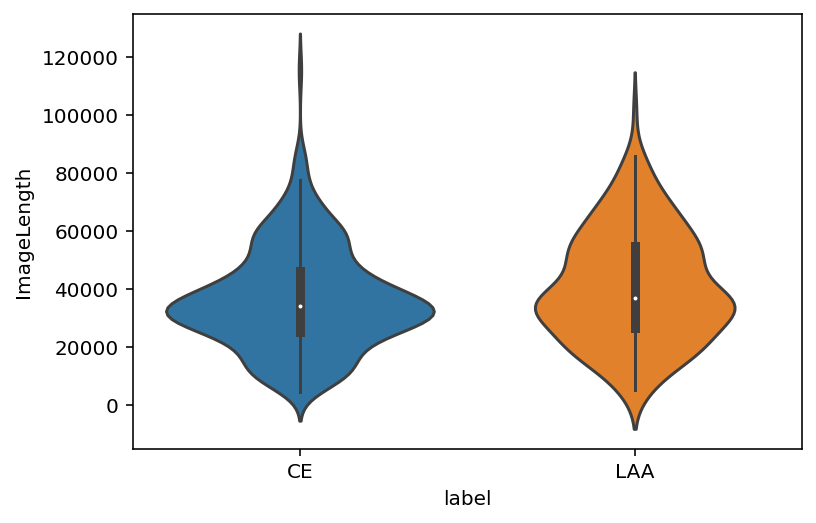

In [132]:
sns.violinplot(data=x, x="label", y="ImageLength")

In [134]:
df

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [11]:
%env OPENCV_IO_MAX_IMAGE_PIXELS=999999999999
import numpy as np
from mayo_clinic_strip_ai.find_ROIs import load_tif
import cv2

image_id = "03e6b7_0"

img = load_tif(f"mayo_clinic_strip_ai/data/train/{image_id}.tif")
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst=img);

env: OPENCV_IO_MAX_IMAGE_PIXELS=999999999999


4


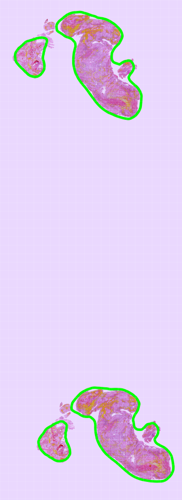

In [12]:
import cv2
from glob import glob
c = [np.load(pth, allow_pickle=False) for pth in glob(f"mayo_clinic_strip_ai/data/ROIs_v2/train/{image_id}/*.npy")]
print(len(c))
plot(cv2.drawContours(img, contours=c, contourIdx=-1, color=(0, 255, 0), thickness=150))

In [99]:
from itertools import combinations

for (i, c1), (j, c2) in combinations(enumerate(c), 2):
    score = cv2.matchShapes(c1, c2, method=cv2.CONTOURS_MATCH_I1, parameter=0.0)
    if score < 0.2:
        print(i, j, score)

0 7 0.018737446790544066
1 6 0.0976198698570247
2 5 0.020484678790037653
3 4 0.11298289880054296


In [6]:
from glob import glob
import pandas as pd

qc = set(pd.read_csv("mayo_clinic_strip_ai/data/qc.csv")["image_id"])
t = set(glob("outputs/2022-08-08/21-25-48/thumbnails/*.jpeg"))
t = {i.split("/")[-1].rstrip(".jpeg") for i in t}

In [8]:
qc - t

{'fd3079_0'}

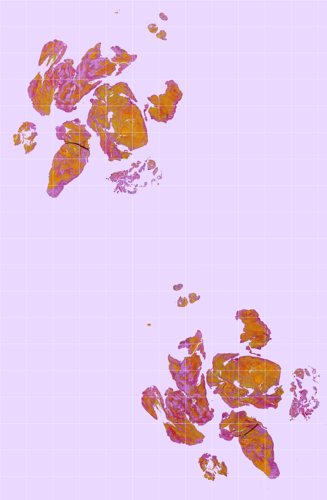

In [2]:
from mayo_clinic_strip_ai.stain import normalize_staining
import cv2

x = cv2.imread("mayo_clinic_strip_ai/data/train/0a3ad1_0.tif", cv2.IMREAD_COLOR)
x = cv2.resize(x, dsize=(0, 0), fx=1/4, fy=1/4)
cv2.cvtColor(x, cv2.COLOR_BGR2RGB, dst=x)
plot(x)

In [3]:
Inorm, H, E = normalize_staining(img=x)

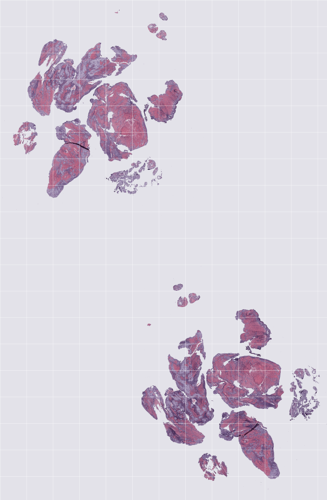

In [4]:
plot(Inorm)

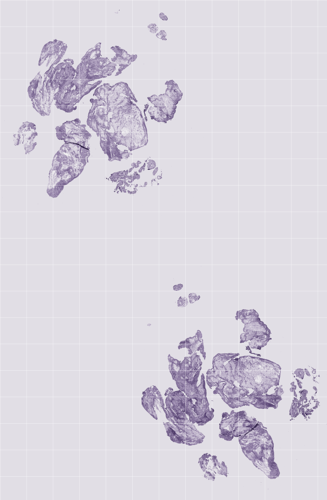

In [5]:
plot(H)

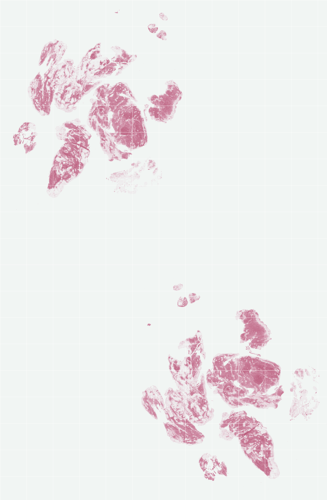

In [6]:
plot(E)

In [7]:
m = (E == (241, 245, 243)) | (E == (255, 255, 255))

In [8]:
m.mean()

0.8633717033477237